<a href="https://colab.research.google.com/github/CMunoz-28/DataAnalytics/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Marketing Analytics & Statistical Analysis

##Exploratory Data Analysis (EDA) - Customer Segmentation

###Perform Exploratory Data Analysis on dataset Mall Customer data

###Dataset:https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


Customer segmentation is the ideal methodology whenever you need to find your best customer.,

Companies can identify segments of customers that share a similarity in various ways relevant to marketing, such as gender, age, interests, and miscellaneous spending habits. This will allow them to target the potential user base.
* In this Project, we will perform one of the most essential applications of machine learning – Customer Segmentation, and execute customer segmentation in Python.

#Libraries, Directory, Data


By exploring the data, our data consists of one .csv file containing the following features that describe each customer:

* CustomerIDs
* Age
* Gender
* Annual Income
* Spending Score

In [1]:
%cd /content/drive/MyDrive/Projects/Analytics/Customer Segmentation

/content/drive/MyDrive/Projects/Analytics/Customer Segmentation


In [2]:
#Install needed Libraries
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px

In [3]:
#Load the data
customer_df = pd.read_csv('Mall_Customers.csv')
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We will start with the first five rows of our dataset using the **head()** function and later use the **describe()** function to output a statistical summary of it.

#Check for missing data

We will need to check for any missing data.

In [4]:
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#Describe the data

We now use the **describe()** function to output a statistical summary of our data.

In [9]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customer_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
customer_df.shape

(200, 5)

#Outliers

Age: 


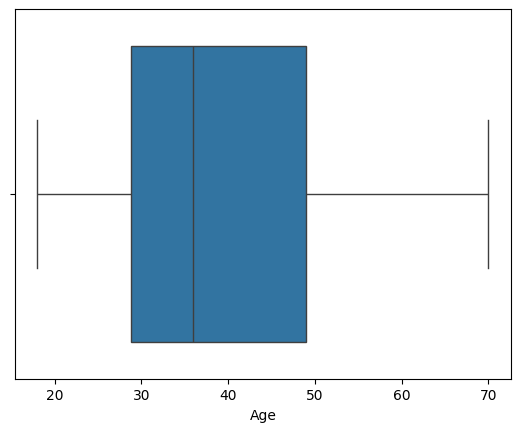

Annual Income (k$): 


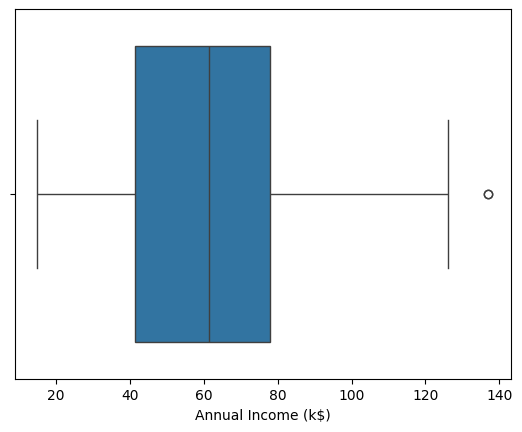

Spending Score (1-100): 


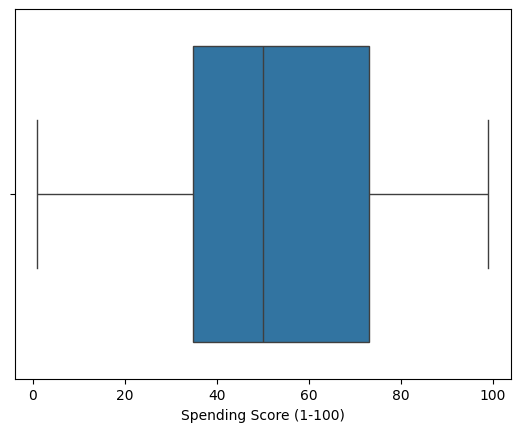

In [13]:
list1 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=customer_df[str(i)])
    plt.show()

#Handling Outliers

Next we will need to remove the outliers from our data.

In [14]:
max_age = customer_df['Age'].quantile(0.99)
max_age

69.00999999999999

In [15]:
max_annual_income_k = customer_df['Annual Income (k$)'].quantile(0.99)
max_annual_income_k

126.1099999999999

In [16]:
max_spending_score = customer_df['Spending Score (1-100)'].quantile(0.99)
print(max_spending_score)

97.00999999999999


# Data Analysis

##Univariate analysis


Univariate analysis entails evaluating a single feature to gain insights about it. So, the initial step in performing EDA is to undertake univariate analysis, which includes evaluating descriptive or summary statistics about the feature.

For example, check a feature distribution, the proportion of a feature, and so on.

In our case, we will check the dataset's distribution of customer's ages. We can do that by typing the following:

Text(0.5, 1.0, "Distribution of Customer's Age")

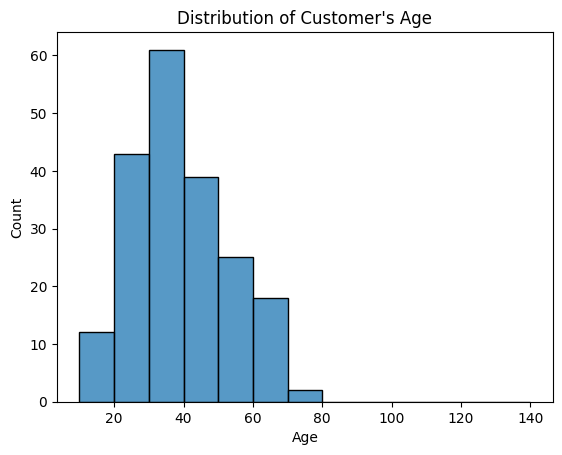

In [18]:
sns.histplot(customer_df, x="Age", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customer's Age")

We can see from the above summary that most of the customers belong in the age range of 30-40.



##Bivariate Analysis

We performed a bivariate analysis, which usually involves the correlation of two attributes at the same time.

In our case, some of the bivariate analysis we'll perform in the project include observing the average total spent across different client age groups, determining a correlation between customer income and total spending, and so on, as shown below.

In [19]:
fig = px.scatter(customer_df, x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 title="Relationship Between Customer's Income and Spending",
                height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

##Multivariate Analysis

After we've completed our univariate (analysis of single feature) and bivariate (analysis of two features) analysis, the last phase of our EDA is to perform a Multivariate Analysis.

This consists of understanding the relationship between two or more variables.

In our project, one of the multivariate analysis we'll do is to understand the relationship between Income, Spending Score, and Gender.

In [20]:
fig = px.scatter(
    data_frame=customer_df,
x = "Annual Income (k$)",
    y = "Spending Score (1-100)",
    facet_col = "Gender",
    title = "Relationship between Income VS Total Amount Spent Based on Age",
    color = "Age",
    height=500
)
fig.show()

We can see from the analysis that Male & Female customers between the ages of 60 to 70 years old generally spend less than other customers between the ages of 20 to 40.

This is because younger adults typically have higher disposable incomes compared to retirees. They are often in the early stages of their careers, earning regular salaries, and have fewer financial obligations such as mortgages, healthcare costs, or supporting dependents, which affects their spending habits.



#Segmentation Model

##The Elbow Method

The elbow method is the strategy we'll use to select the best cluster. It works very well by plotting the error from each cluster and looking for a spot that forms an elbow on the plot.

As a result, the ideal cluster is the one that produces that elbow.

In [23]:
customer_df["Annual Income (k$)"].fillna(customer_df["Annual Income (k$)"].median(), inplace=True)

In [25]:
data = customer_df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [26]:
df_log = np.log(data)

In [27]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

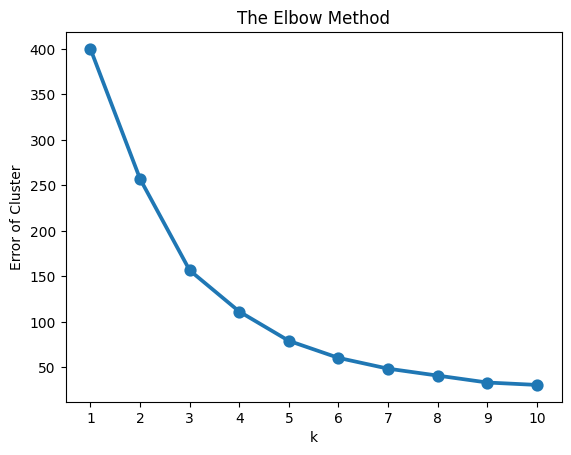

In [28]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)


plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()

Let's summarize what the above code does. We specified the number of clusters to experiment with in the **range(1, 11)**. Then, we fit the features on those clusters and added the error to the list we created above.

Following that, we plot the error for each cluster. The diagram shows that the cluster that creates the elbow is three. So, three clusters is the best value for our model. As a result, we will build the **KMeans** model utilizing three clusters.

In [29]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [31]:
data = data.assign(ClusterLabel = model.labels_)

Now we've built our model. The next thing will be to assign the cluster label for each observation. So we will assign the label to the original feature we didn't processed. That is, where we assigned Annual Income and Spending Score  to the variable data

Now that we've built the model, the next step is to interpret the results from each cluster.

Depending on your goals, there are numerous ways to summarize your cluster's results. The most common summary uses central tendency, which includes mean, median, and mode.

For our case, we will use the median. We're using the median because the original features have outliers, and the mean is very sensitive to outliers.

Our next step involves aggregating the cluster labels and finding the median for Annual Income and Spending Score. We will achieve this using the Pandas groupby method. This method allows us to group the data by the cluster labels and then calculate the median for each group. The result is a clear and concise summary of the data, facilitating our interpretation of the results.

In [32]:
data.groupby("ClusterLabel")[["Annual Income (k$)", "Spending Score (1-100)"]].median()

,Annual Income (k$),Spending Score (1-100)
ClusterLabel,,
0,63.5,54.0
1,28.0,58.0
2,78.0,11.5


We can see that there is a trend within the clusters:

* Cluster 0 translates to customers who earn less and spend less.
* Cluster 1 represent customers that earn more and spend more.
* Cluster 2 represents customers that earn moderate and spend moderate.

In [33]:
fig = px.scatter(
    data_frame=data,
    x = "Spending Score (1-100)",
    y= "Annual Income (k$)",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

In [35]:
data = customer_df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [36]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [37]:
customer_df = data.assign(ClusterLabel= model.labels_)

In [38]:
customer_df.groupby("ClusterLabel").agg({"Age":"mean", "Annual Income (k$)":"median", "Spending Score (1-100)":"median"}).round()

,Age,Annual Income (k$),Spending Score (1-100)
ClusterLabel,,,
0,52.0,58.0,41.0
1,27.0,24.0,73.0
2,30.0,74.0,60.0


We can see from the above summary that:

* Cluster 0 depicts mature customers that earn a lot and also spend a lot.
* Cluster 1 translates to older customers that earn a lot and also spend a lot.
* Cluster 2 depicts young customers that earn less and also spend less.

#Visualization

We can also visualize our results by the following chart:

In [41]:
fig = px.scatter_3d(customer_df, x="Annual Income (k$)",
                    y="Spending Score (1-100)", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()